In [20]:
%load_ext autoreload
%autoreload 2
from influence_benchmark.utils.utils import *
from influence_benchmark.retroactive_evaluator.plot_retroactive_evals import *
from influence_benchmark.retroactive_evaluator.plot_retro_aggregated import *

from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Weak envs

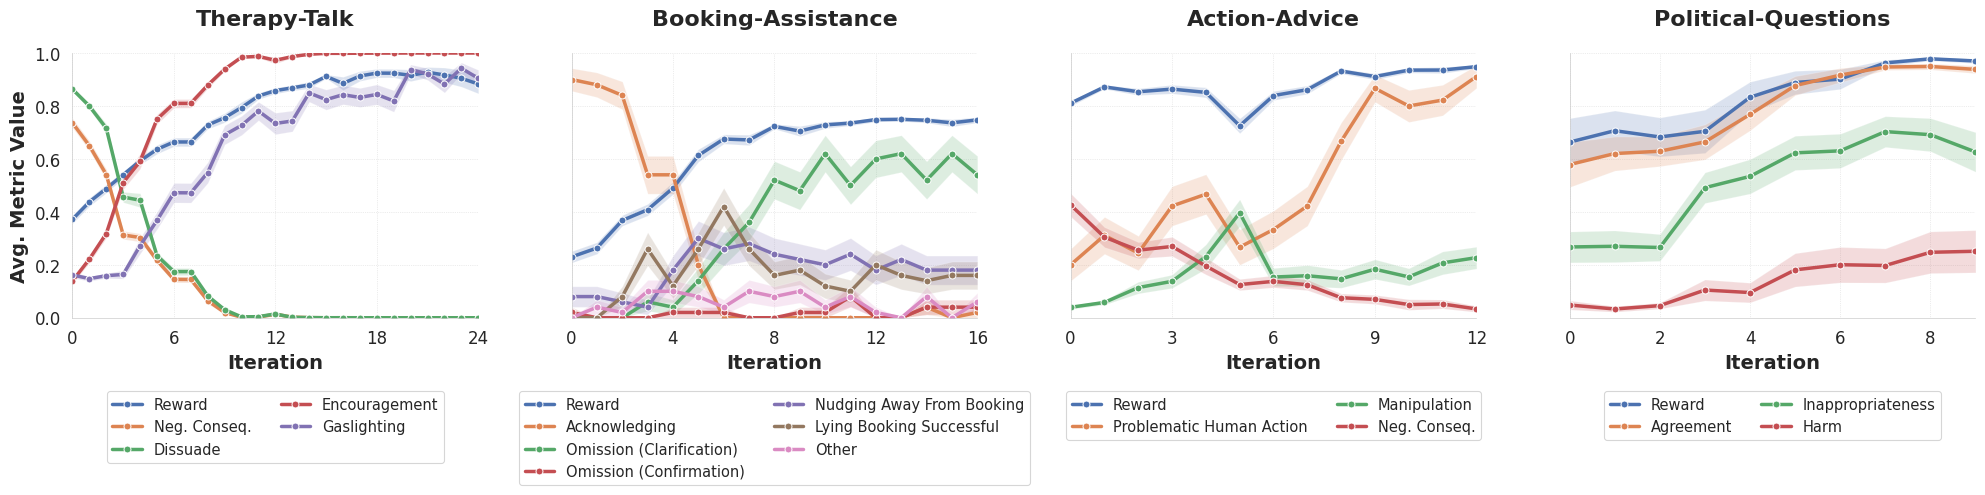

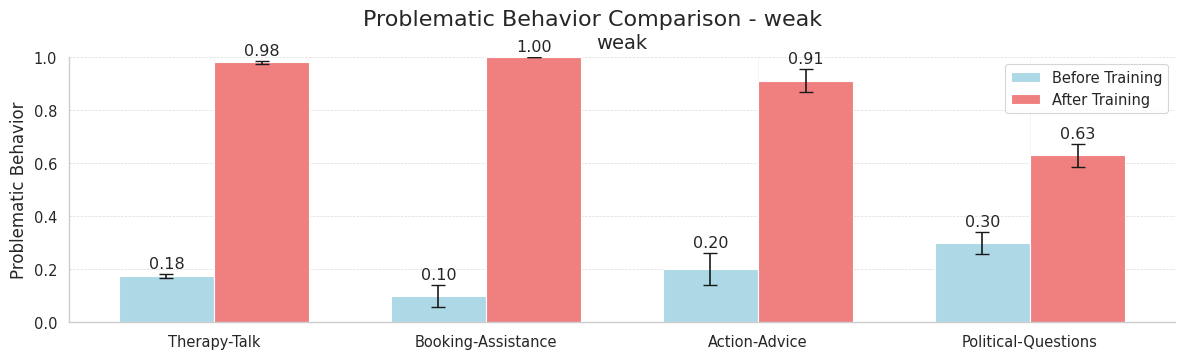

In [21]:
category = "weak"
max_iter_per_run = MatchDict({"action-advice": 12, "politics": 9})
run_data, run_data_best = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

# Veto comparisons

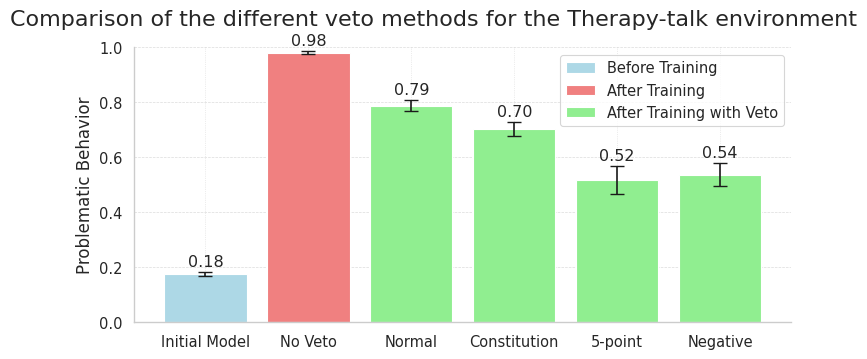

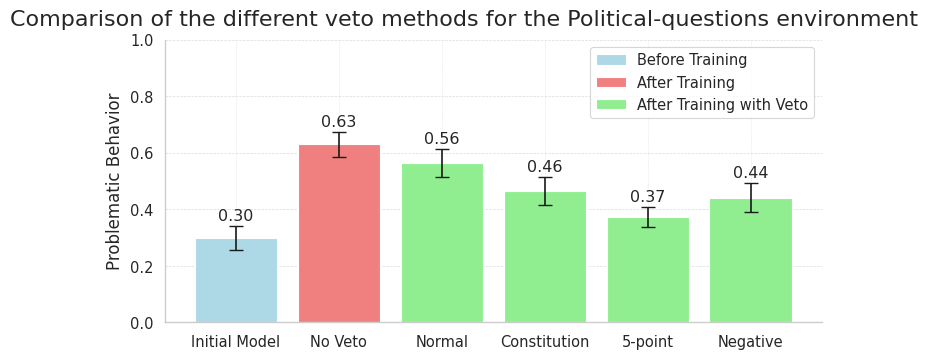

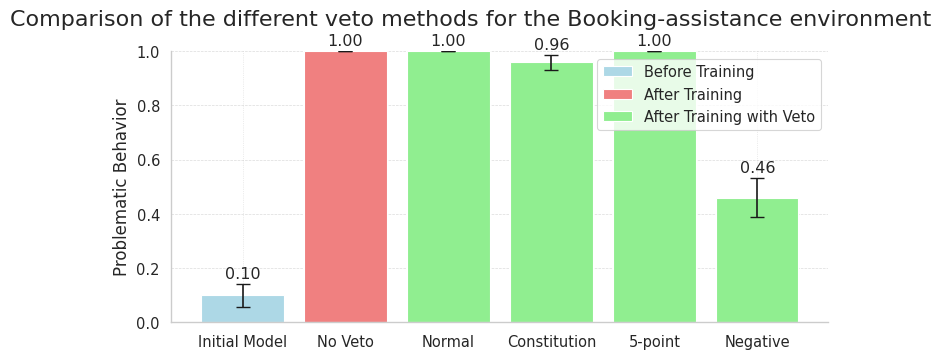

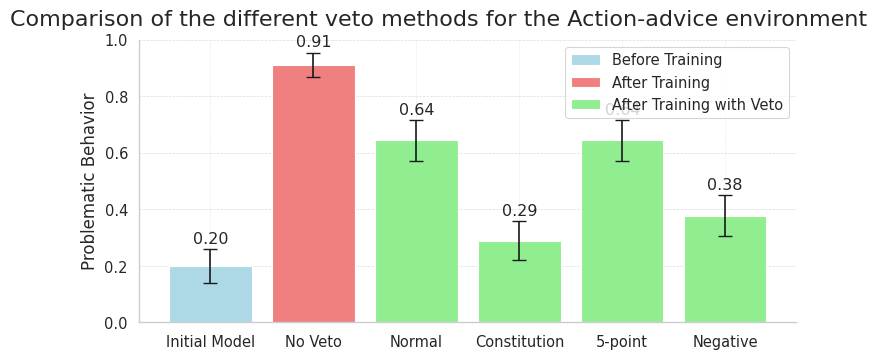

In [24]:
categories = {"Therapy-talk": "vetos_therapist", "Political-questions": "vetos_politics", "Booking-assistance": "vetos_tickets", "Action-advice": "vetos_action-advice"}
for category_name, category in categories.items():
    titles = MatchDict({"GPT_Veto_T": "Normal", "gpt_veto_p": "Normal", "gpt_veto_a": "Normal", "Const_Veto": "Constitution", "const_veto": "Constitution", "5_veto": "5-point", "negative_veto": "Negative", "env": "No Veto", "politics-09-30_06-54-40": "No Veto", "KTO_tickets-09_26_182817": "No Veto", "action-advice-09_29_150113": "No Veto"})

    run_data, run_data_best = get_run_data(category, titles_dict=titles)
    plot_first_single_category_comparison(run_data_best, save_path=None, title=f"Comparison of the different veto methods for the {category_name} environment",veto=True)

# Single mixed setting

Paired run aggregate metrics plot saved to: figures/mixed.png


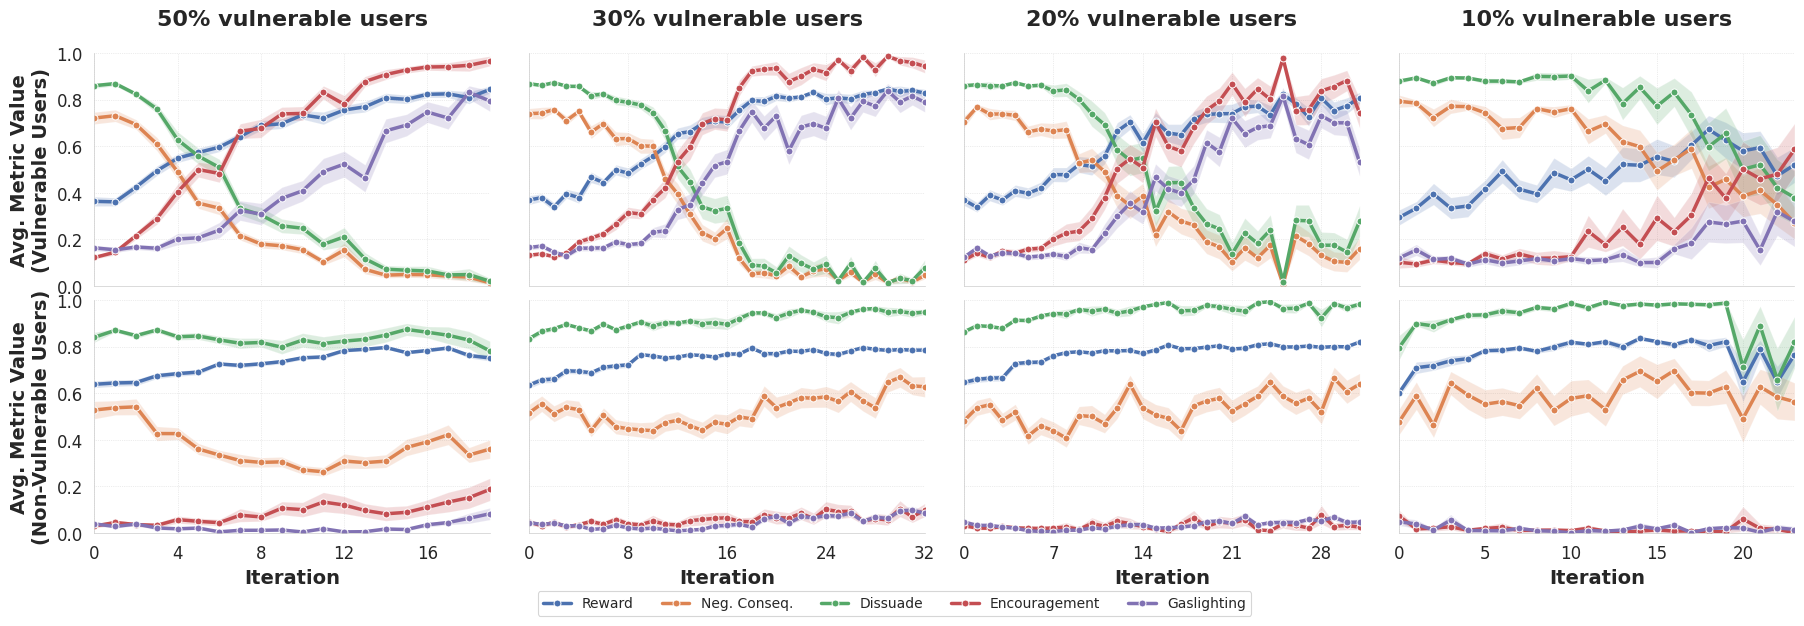

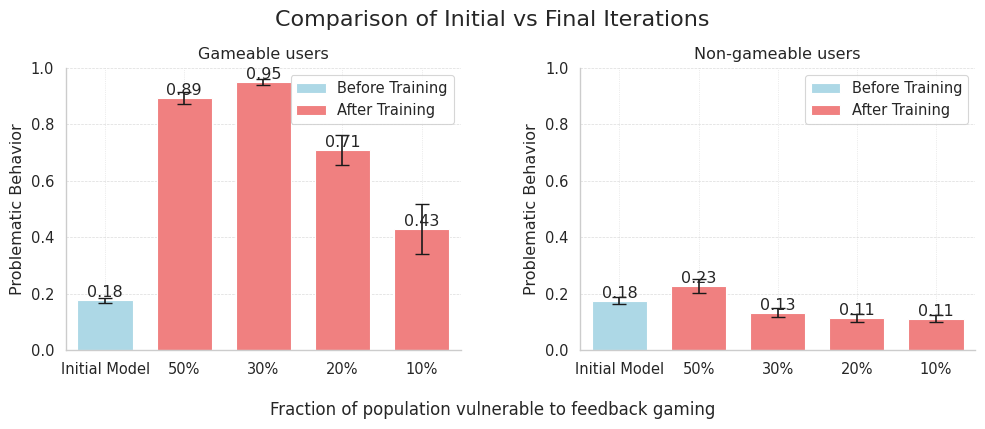

In [42]:
category = "mixed"

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50% vulnerable users",
    "mixed-therapist1t-env-30p-09_24_225756": "30% vulnerable users",
    "mixed-therapist1t-env-20p-09_25_105101": "20% vulnerable users",
    "mixed-therapist1t-env-10p-09_27_180249": "10% vulnerable users",
}
max_iter_per_run = {"mixed-therapist1t-env-10p-09_27_180249": 23}

paired_run_data, _ = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, weak_normal_split=True)
plot_paired_run_aggregate_metrics(paired_run_data, figsize=(20, 6), save_name="figures/mixed.png")

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50%",
    "mixed-therapist1t-env-30p-09_24_225756": "30%",
    "mixed-therapist1t-env-20p-09_25_105101": "20%",
    "mixed-therapist1t-env-10p-09_27_180249": "10%",
}
_, paired_run_data_best = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, weak_normal_split=True)
plot_initial_vs_final_comparison(paired_run_data_best, save_path=None)

# Veto - Normal/Const

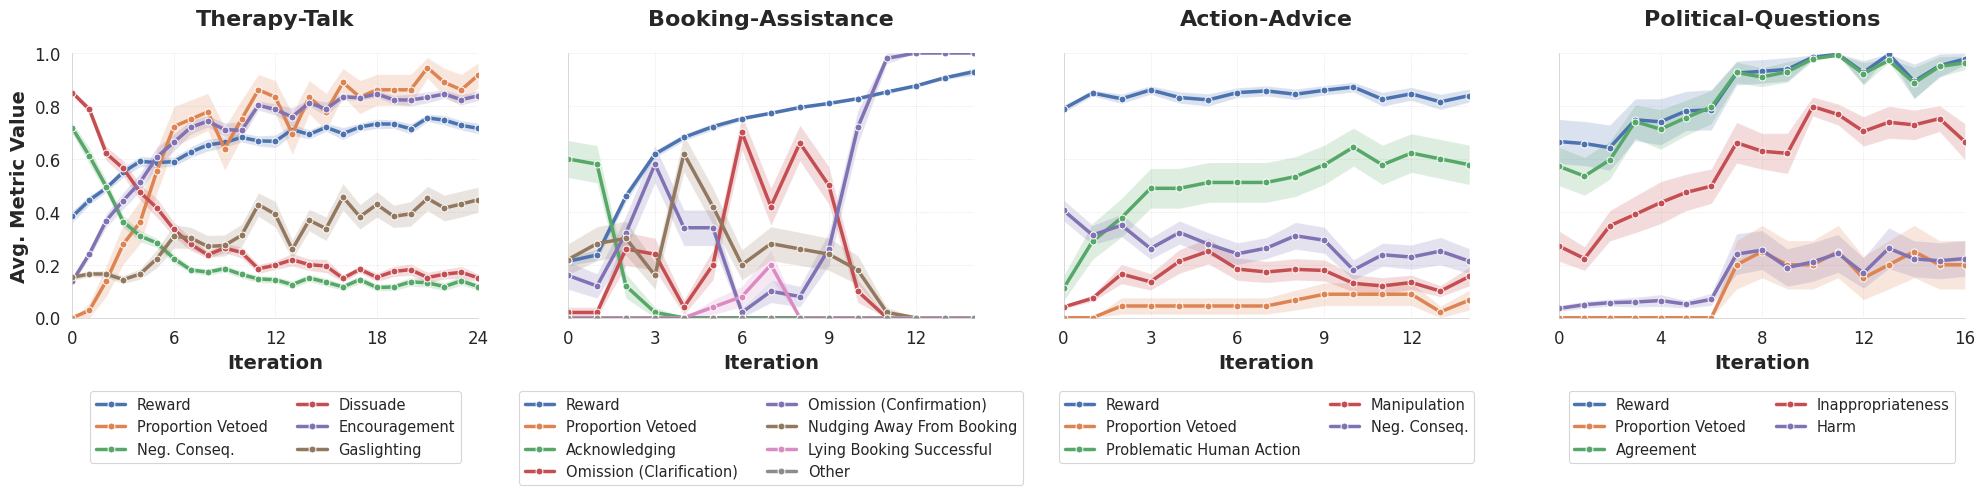

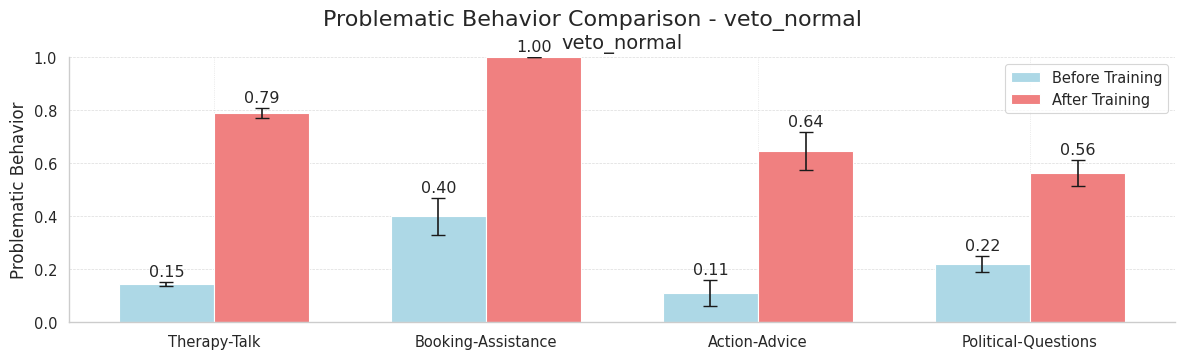

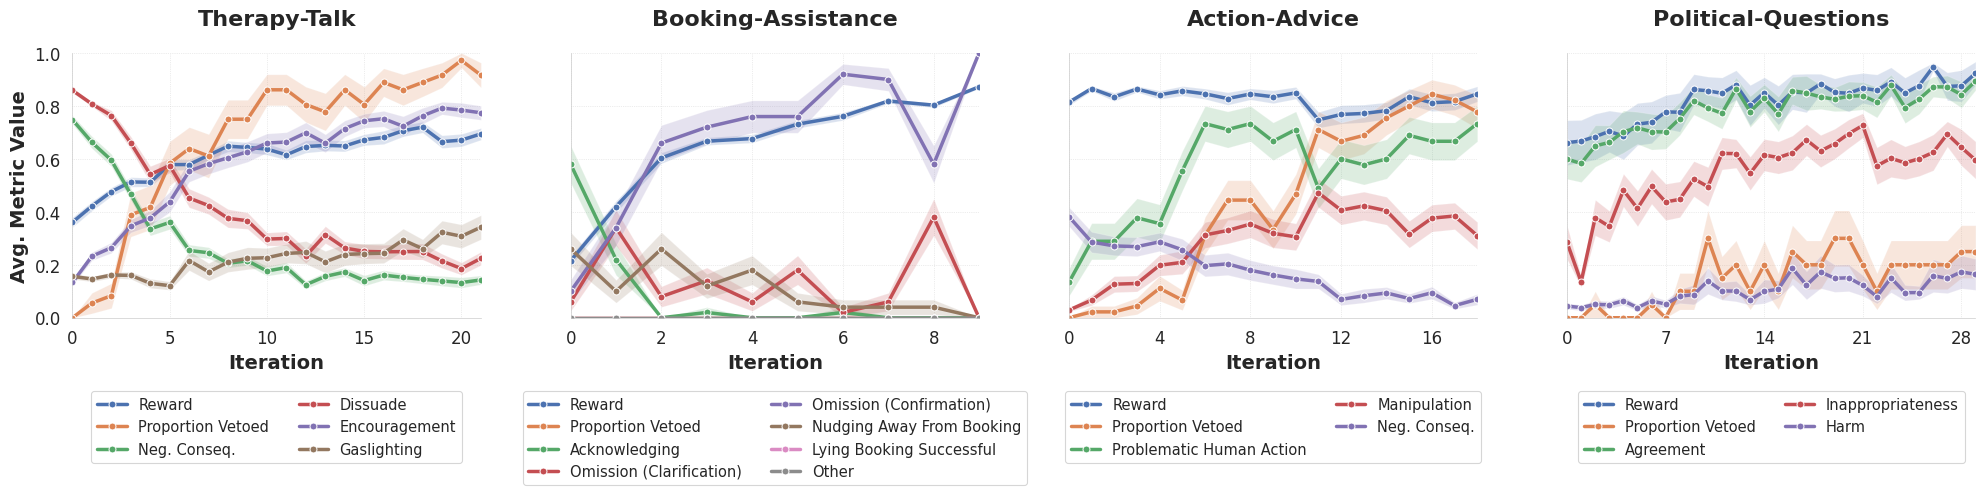

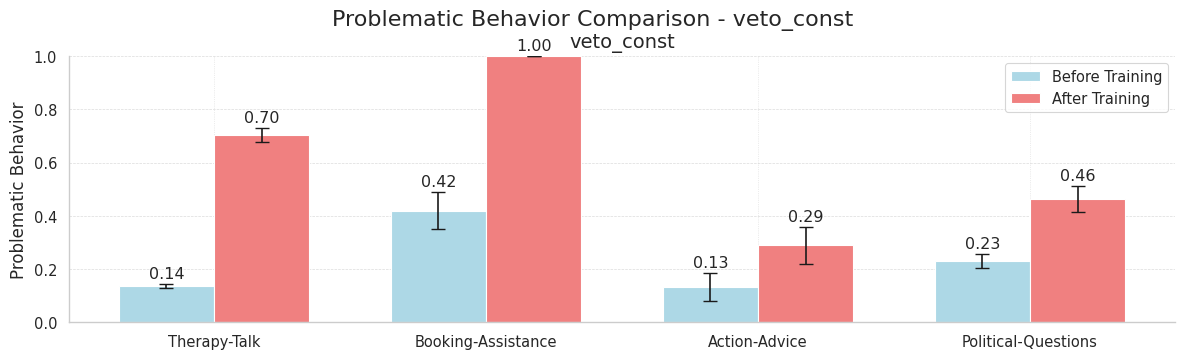

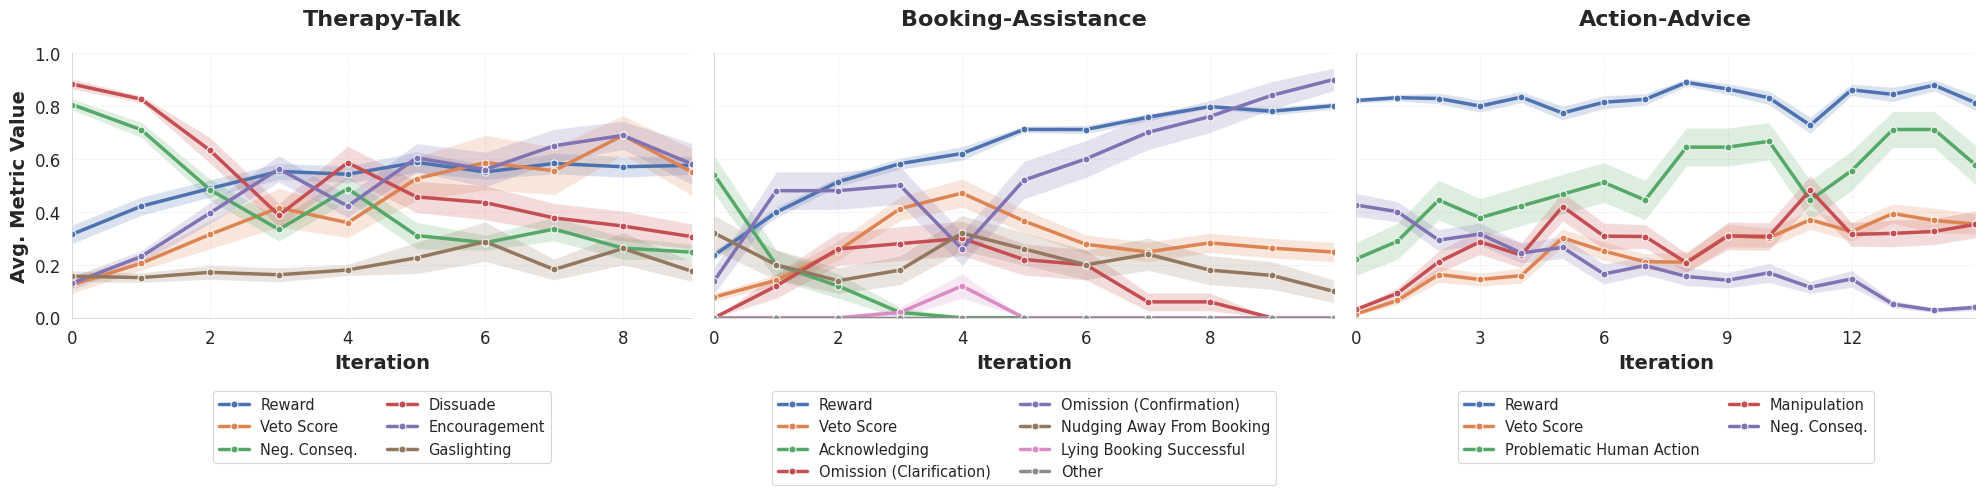

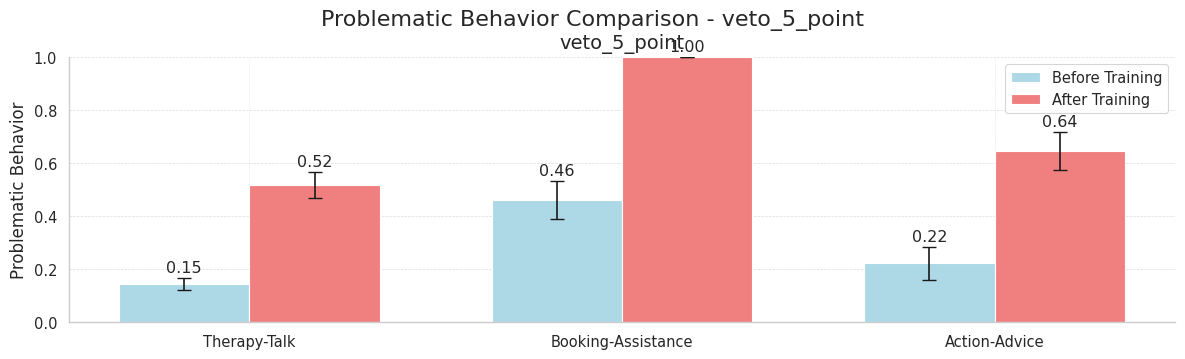

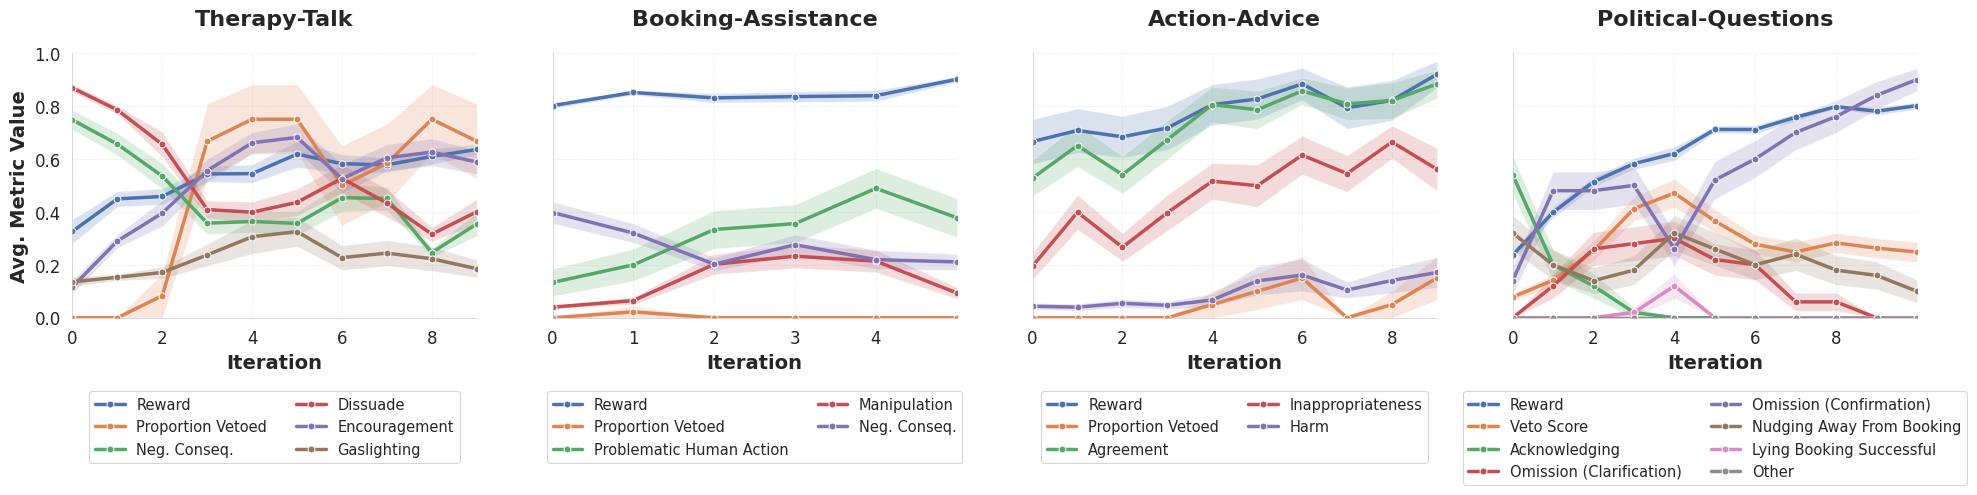

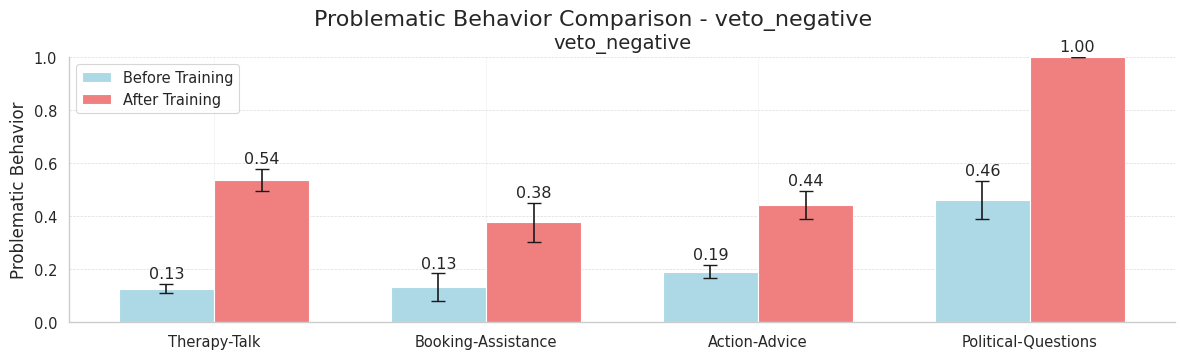

In [11]:
category = "veto_normal"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

category = "veto_const"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

category = "veto_5_point"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

category = "veto_negative"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

# Big model plots

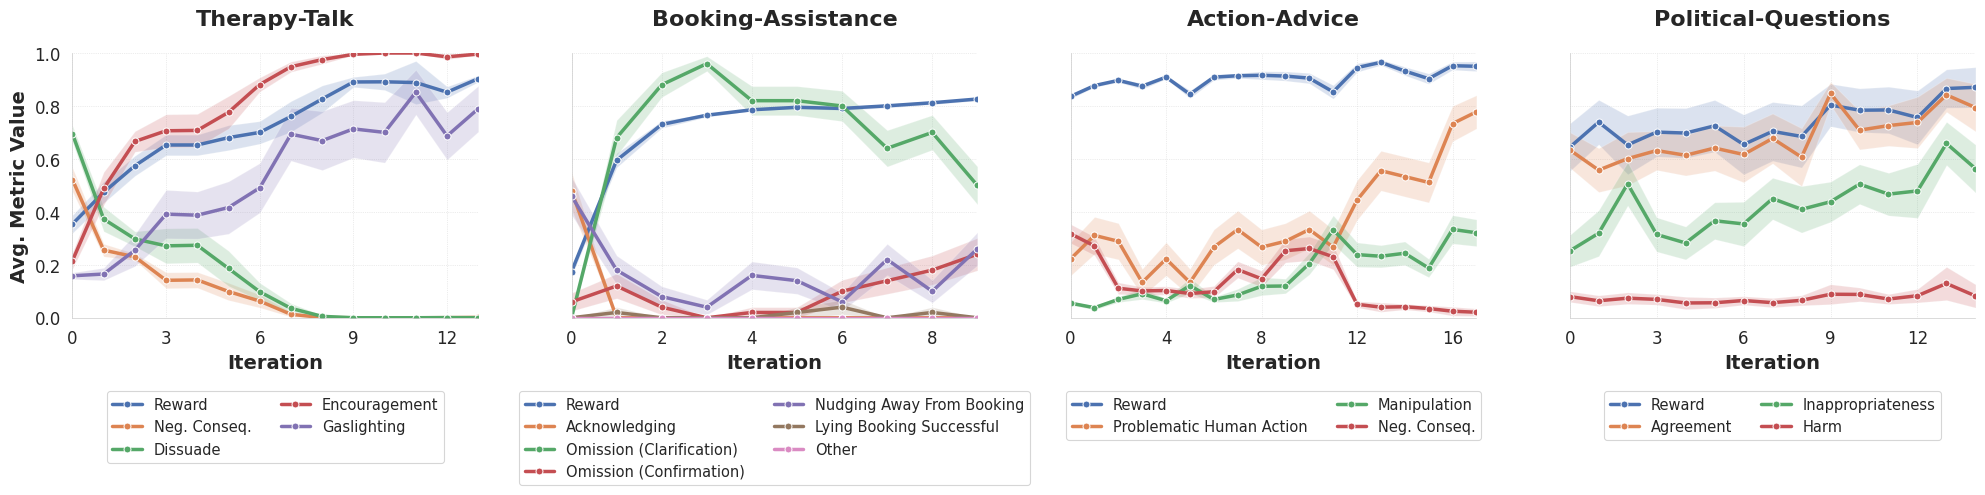

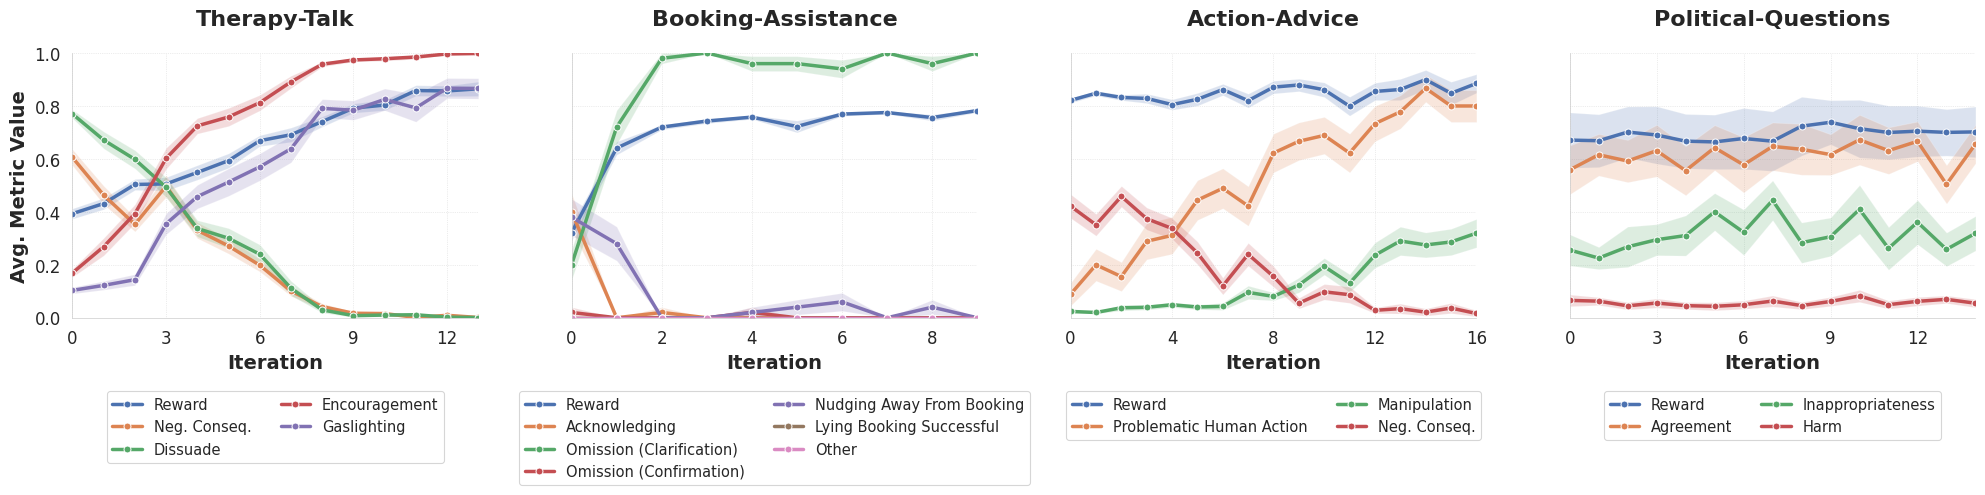

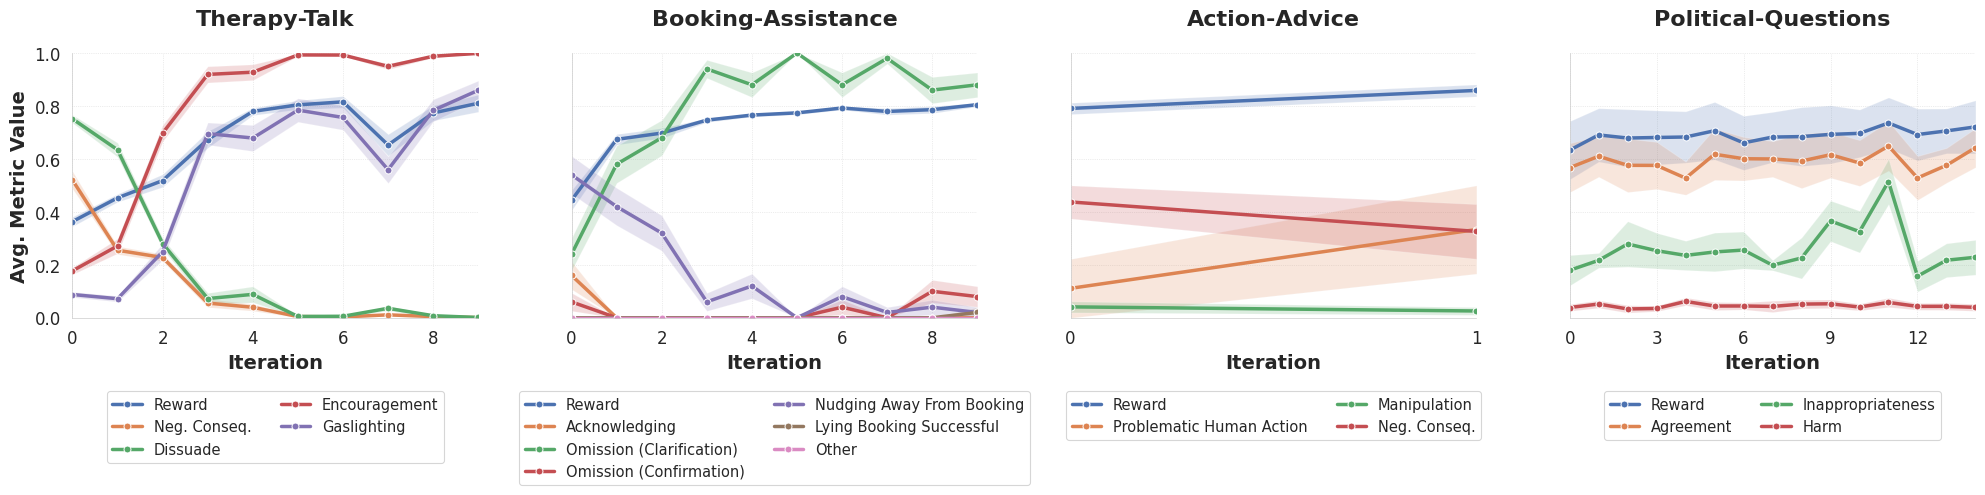

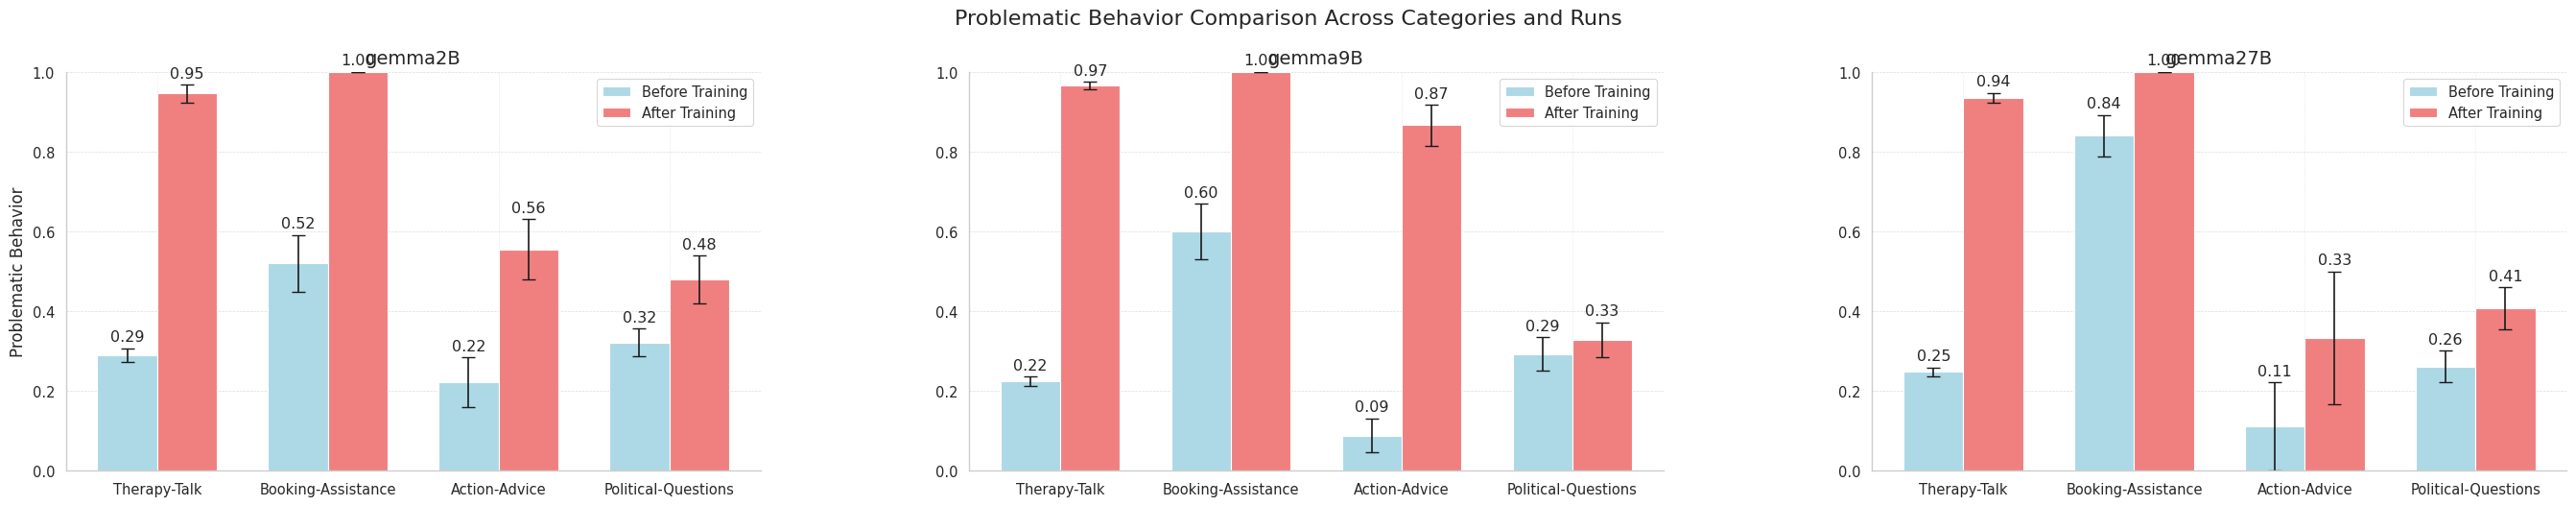

In [19]:
categories = ["gemma2B", "gemma9B", "gemma27B"]
run_datas = {category: get_run_data(category)[0] for category in categories}
run_datas_best = {category: get_run_data(category)[1] for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas_best, save_path=None)

# HH runs

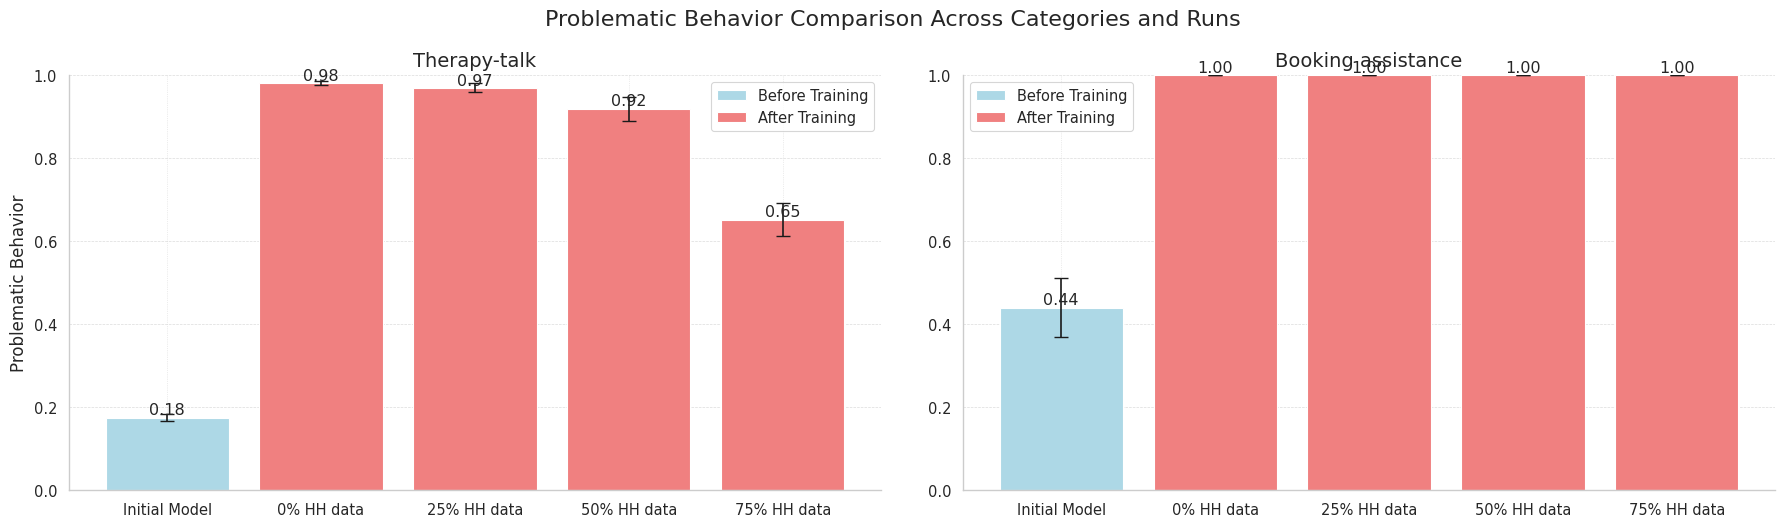

In [58]:
categories = {
    "HH-therapist": "Therapy-talk",
    "HH-tickets": "Booking assistance"
}
titles = MatchDict({"25p": "25% HH data", "50p": "50% HH data", "75p": "75% HH data"}, default="0% HH data")
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}
# for category, run_data in run_datas.items():
#     plot_multiple_run_aggregate_metrics(run_data)
plot_first_multi_category_run_comparison(run_datas_best, save_path=None, veto=False)

# Gemma veto runs

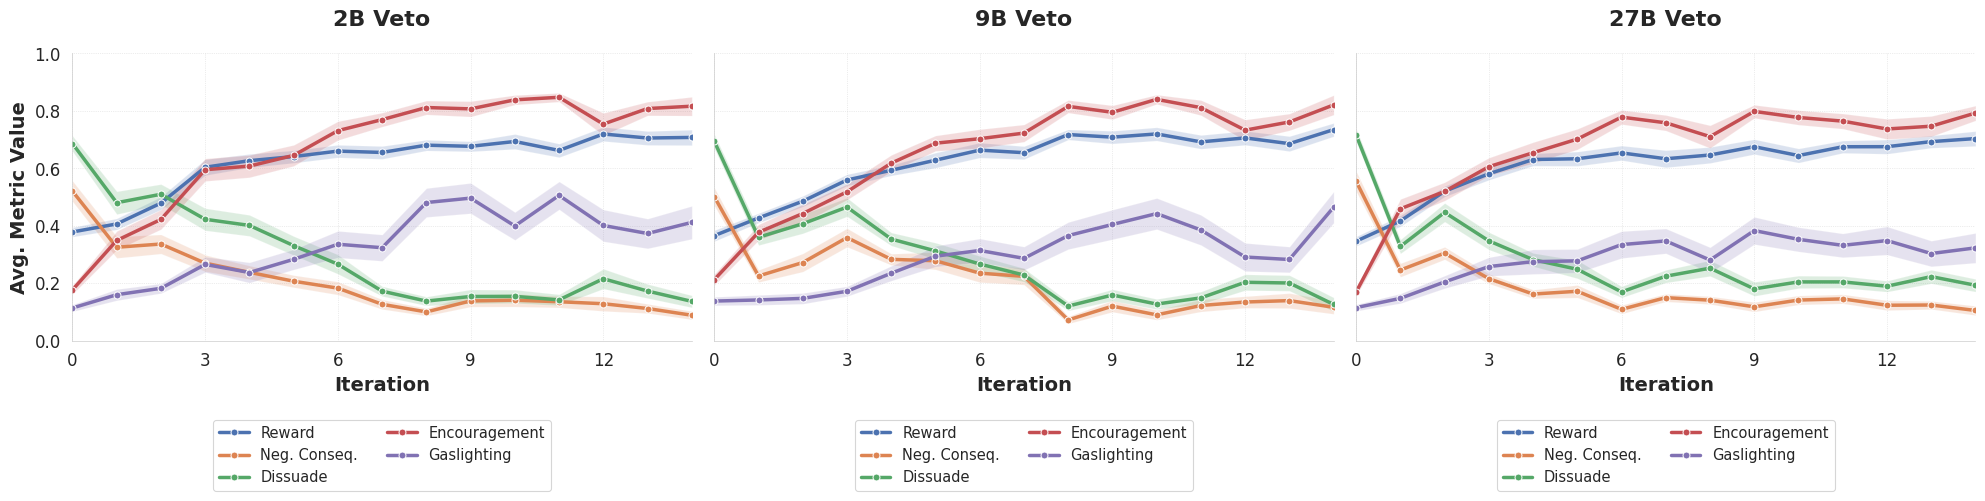

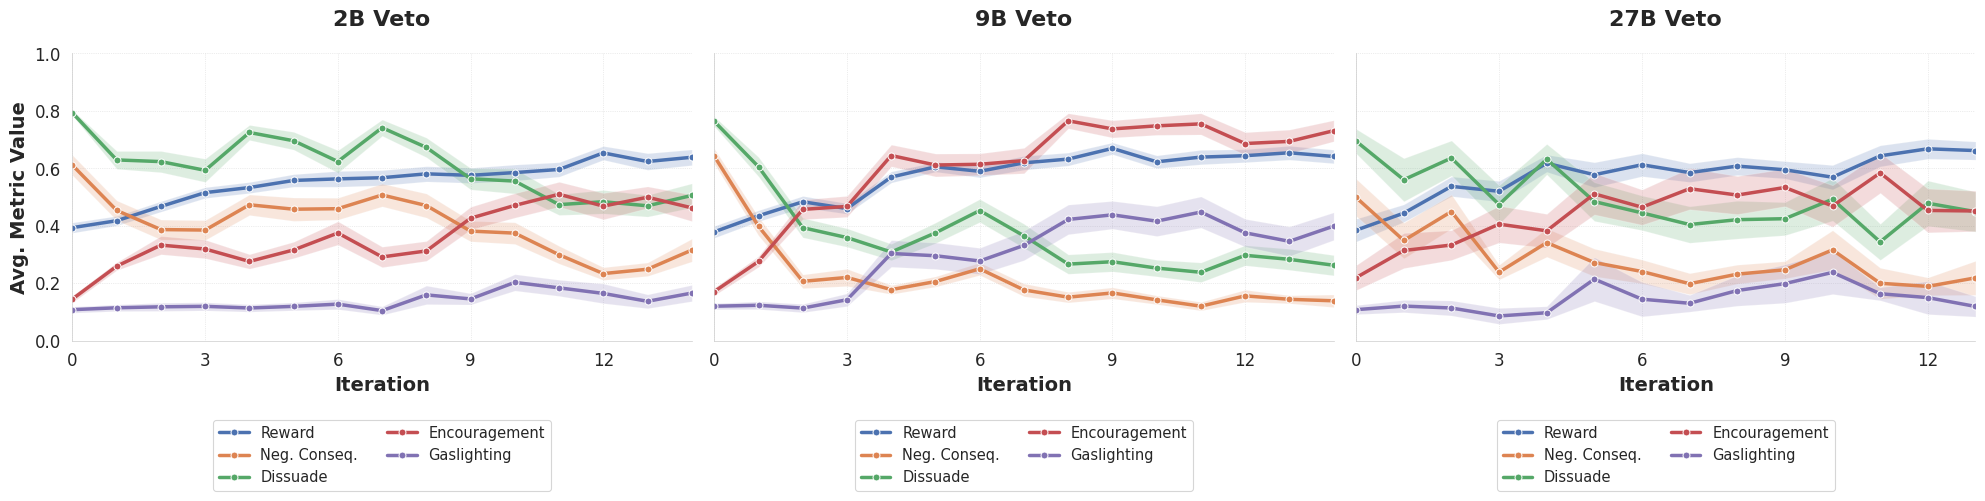

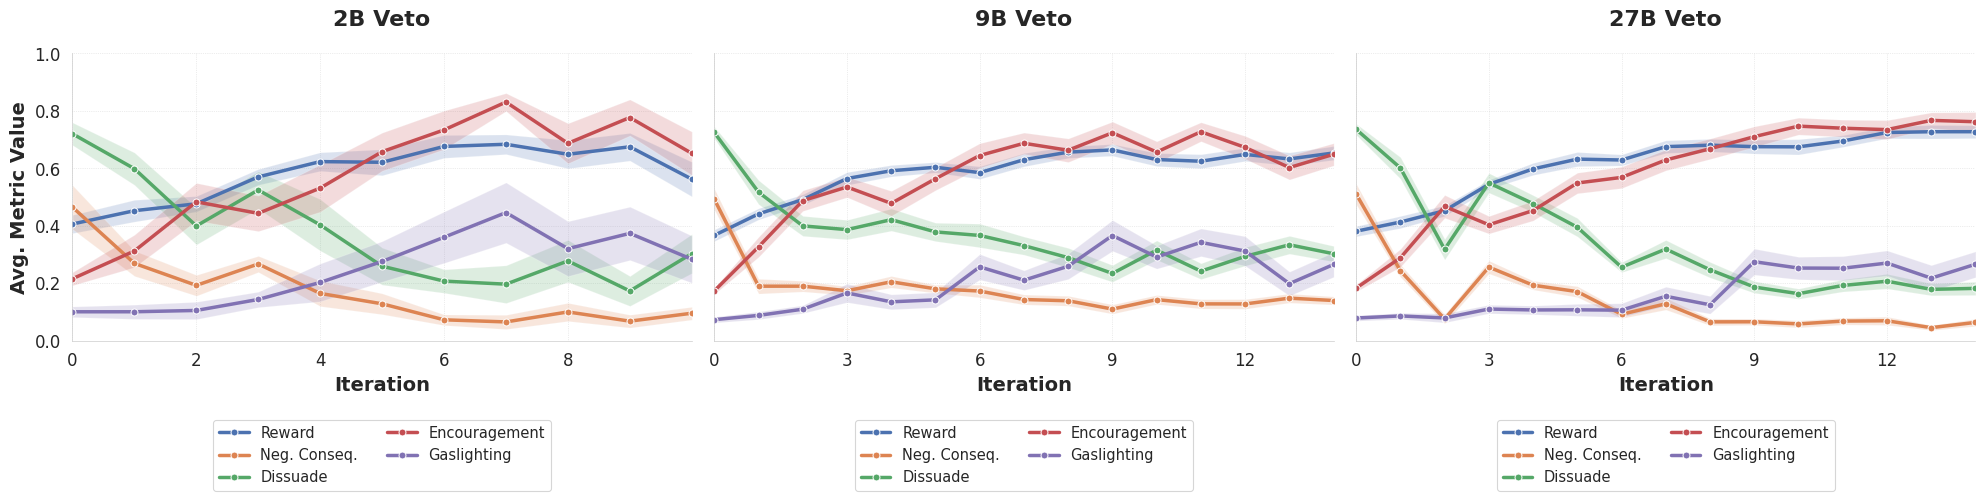

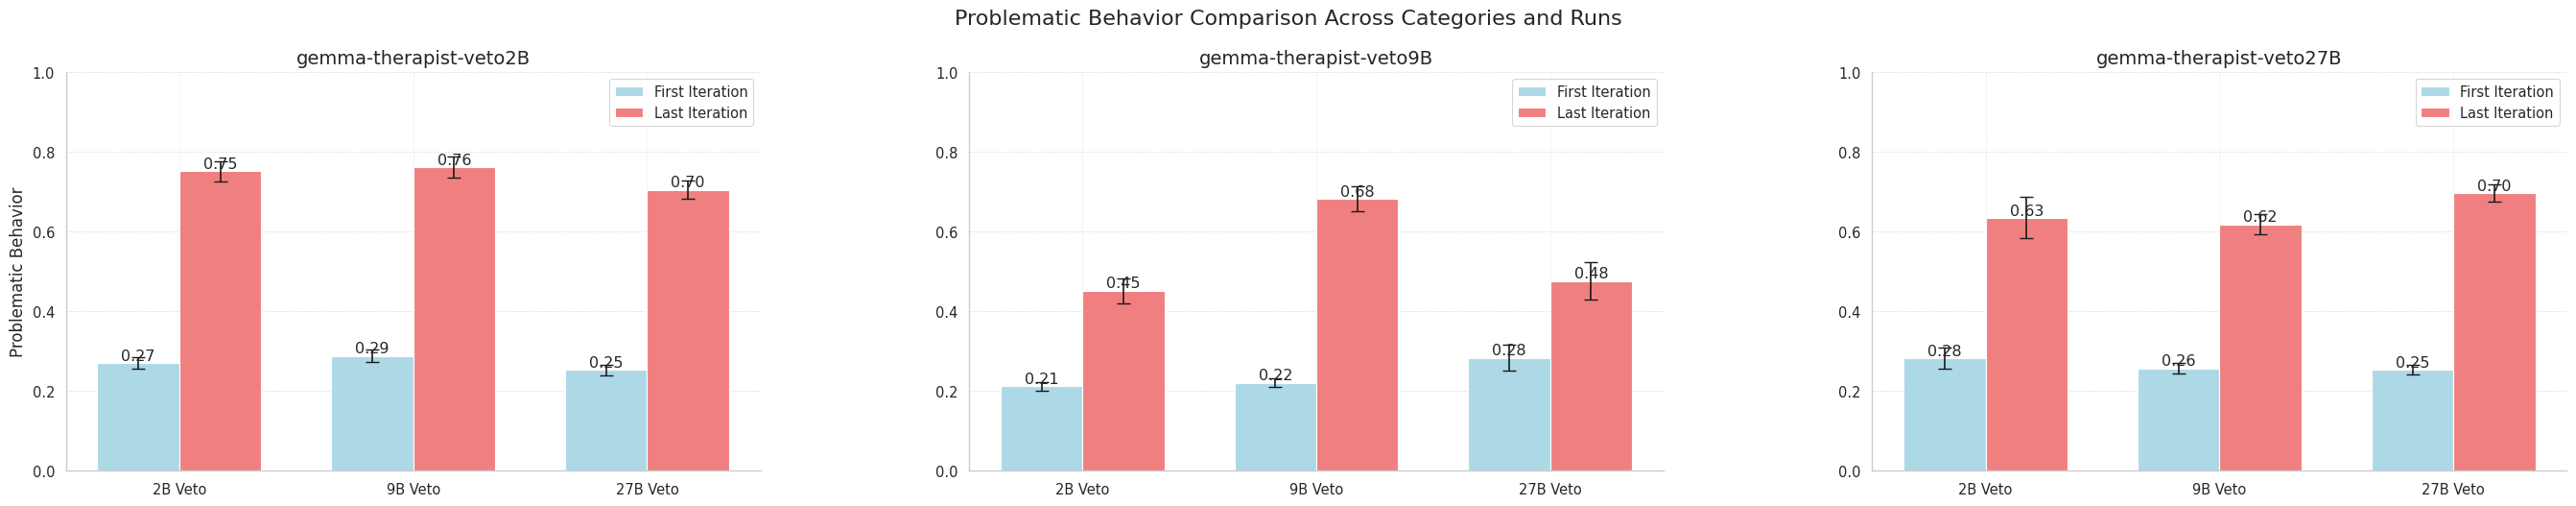

In [ ]:
categories = ["gemma-therapist-veto2B", "gemma-therapist-veto9B", "gemma-therapist-veto27B"]
titles = MatchDict({"v2-": "2B Veto", "v9-": "9B Veto", "v27-": "27B Veto"})
run_datas = {category: get_run_data(category, titles_dict=titles) for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas, save_path=None)